In [7]:
import pandas as pd

df = pd.read_csv("Phishing_Email.csv")

# Afficher les premières lignes du dataset
df.head()


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [9]:
#Affichage des informations générales du DataSet:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [11]:
# Vérifier les premières valeurs de la colonne
df["Unnamed: 0"].head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: Unnamed: 0, dtype: int64

In [13]:
# Vérifier la distribution des classes
df["Email Type"].value_counts()


Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

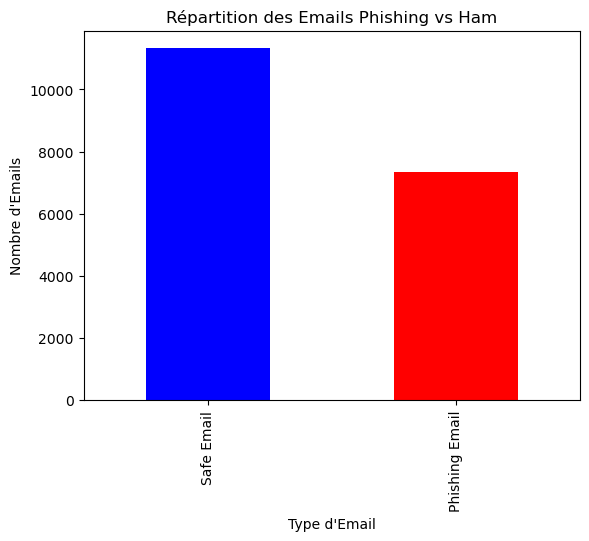

In [15]:
import matplotlib.pyplot as plt

df["Email Type"].value_counts().plot(kind="bar", color=["blue", "red"])
plt.xlabel("Type d'Email")
plt.ylabel("Nombre d'Emails")
plt.title("Répartition des Emails Phishing vs Ham")
plt.show()


In [17]:
# Afficher quelques e-mails
for i in range(3):  # Change le nombre pour voir plus d'exemples
    print(f"Email {i+1} :\n", df["Email Text"].iloc[i])
    print("-" * 80)


Email 1 :
 re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us use of 's on ' but not 'd aughter ' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n't normally use ' brother ' in this way any more than we do 'd aughter ' , and it is hard to imagine a natural class comprising senior relatives and 's on ' but excluding ' brother ' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone 's attention , and hence at the beginning of an utterance , whereas 's on ' seems more natural in utterances like ' yes , son ' , ' hand me that , son ' than in ones like ' son ! ' or ' son , help me ! ' ( although perhaps these latter ones ar

In [19]:
#verification de la longueur des emails
df["email_length"] = df["Email Text"].apply(lambda x: len(str(x)))

df.groupby("Email Type")["email_length"].describe()


,count,mean,std,min,25%,50%,75%,max
Email Type,,,,,,,,
Phishing Email,7328.0,1610.407205,3349.373635,1.0,353.0,731.0,1566.25,129635.0
Safe Email,11322.0,3493.008391,160168.024661,5.0,444.0,994.5,2029.75,17036692.0


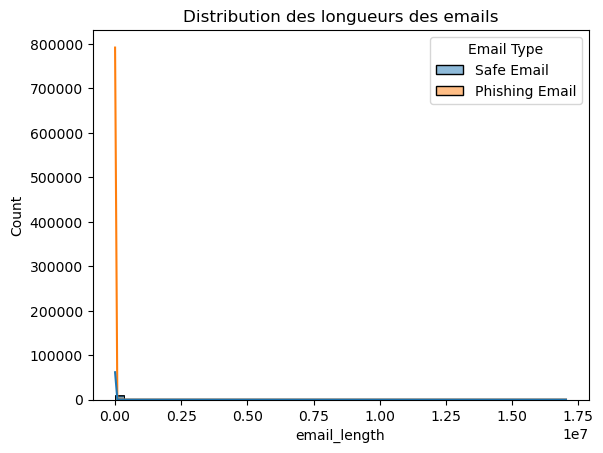

In [21]:
#visualisation de la repartition des longueurs
import seaborn as sns

sns.histplot(data=df, x="email_length", hue="Email Type", bins=50, kde=True)
plt.title("Distribution des longueurs des emails")
plt.show()


In [23]:
#Suppression de la colonne Unnamed:0 car c'est juste un indexe
df.drop(columns=["Unnamed: 0"], inplace=True)
print("Colonne 'Unnamed: 0' supprimée.")


Colonne 'Unnamed: 0' supprimée.


In [25]:
#Suppression de 16 emails avec un texte manquant su 18650
df.dropna(subset=["Email Text"], inplace=True)
print(f"Nombre de lignes après suppression des valeurs manquantes : {len(df)}")


Nombre de lignes après suppression des valeurs manquantes : 18634


In [27]:
#verification de la distribution de classes
print(df["Email Type"].value_counts())


Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


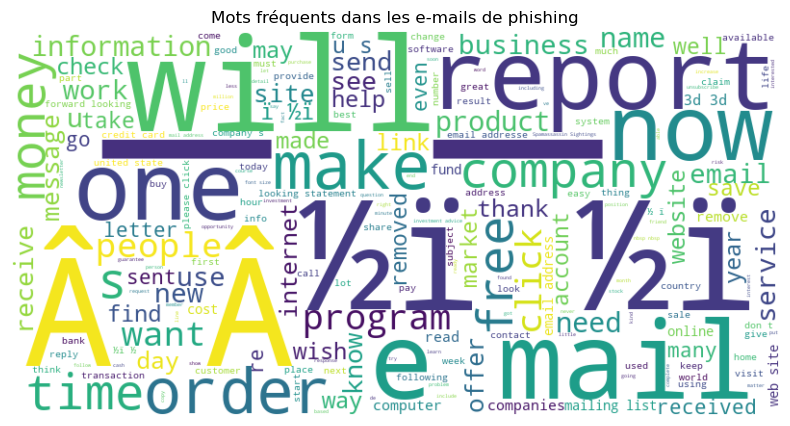

In [31]:
#creer un nuage de mots pour les emails phishing pour l'analyse de mots frequents
from wordcloud import WordCloud
#filtrer uniquement les emails phishing
phishing_text = " ".join(df[df["Email Type"] == "Phishing Email"]["Email Text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(phishing_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Mots fréquents dans les e-mails de phishing")
plt.show()


In [ ]:
# Filtrer uniquement les e-mails sûrs
safe_text = " ".join(df[df["Email Type"] == "Safe Email"]["Email Text"].dropna().astype(str))

# Générer le word cloud
wordcloud_safe = WordCloud(width=800, height=400, background_color="white").generate(safe_text)

# Afficher le word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_safe, interpolation="bilinear")
plt.axis("off")
plt.title("Mots fréquents dans les e-mails sûrs")
plt.show()


### PRETRAITEMENT DES TEXTES D'EMAILS

## Les e-mails contiennent souvent du bruit (ponctuation, HTML, mots inutiles). On va :
## ✅ Convertir en minuscules
## ✅ Supprimer les balises HTML
## ✅ Supprimer les caractères spéciaux et la ponctuation
## ✅ Supprimer les mots vides (stopwords)
## ✅ Lemmatiser les mots (réduire à leur forme de base, ex: "running" → "run")

In [46]:

#NETTOYAGE DES EMAILS:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources NLTK
nltk.download("stopwords")
nltk.download("wordnet")

# Initialiser le lemmatizer et les stopwords anglais
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if not isinstance(text, str):
        return ""  # Éviter les erreurs avec les NaN
        
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r"<.*?>", "", text)  # Supprimer les balises HTML
    text = re.sub(r"[^a-z\s]", "", text)  # Garder seulement les lettres
    words = text.split()  # Tokenizer : diviser en mots
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization + Stopwords
    return " ".join(words)  # Reconstruire le texte propre

# Appliquer à la colonne Email Text
df["Cleaned Email Text"] = df["Email Text"].dropna().apply(clean_text)

# Afficher quelques lignes pour vérifier
df[["Email Text", "Cleaned Email Text"]].head(5)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\congo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\congo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Email Text,Cleaned Email Text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",disc uniformitarianism sex lang dick hudson ob...
1,the other side of * galicismos * * galicismo *...,side galicismos galicismo spanish term name im...
2,re : equistar deal tickets are you still avail...,equistar deal ticket still available assist ro...
3,\nHello I am your hot lil horny toy.\n I am...,hello hot lil horny toy one dream open minded ...
4,software at incredibly low prices ( 86 % lower...,software incredibly low price lower drapery se...


In [48]:
#VECTORISATION DU DATASET
#-------------------------
#Les algorithmes de machine learning ne comprennent pas le texte brut,
#donc on doit le convertir en vecteurs numériques.
#Deux methodes pour convertir le texte brut en données numériques exploitables
#📌1. Bag of Words (BoW)
#Compte le nombre de fois qu’un mot apparaît.
#Ignore l’ordre des mots.
#Créé une grande matrice avec beaucoup de 0 (sparce matrix).
#📌2. TF-IDF (Term Frequency - Inverse Document Frequency)
#Met plus d'importance aux mots fréquents dans un e-mail mais rares
#dans l’ensemble du dataset.

#IMPLEMENTATION TF-IDF
#-----------------------
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # On limite à 5000 mots les plus fréquents

# Transformer le texte en vecteurs TF-IDF
X = vectorizer.fit_transform(df["Cleaned Email Text"])

# Convertir en DataFrame pour voir à quoi ça ressemble
import pandas as pd
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher un aperçu des premières colonnes
print(X_df.head(5))

df = df.dropna(subset=["Email Type"])

    aa  aaa   ab  ability      able  abroad  absence  absolute  absolutely  \
0  0.0  0.0  0.0      0.0  0.000000     0.0      0.0       0.0         0.0   
1  0.0  0.0  0.0      0.0  0.000000     0.0      0.0       0.0         0.0   
2  0.0  0.0  0.0      0.0  0.000000     0.0      0.0       0.0         0.0   
3  0.0  0.0  0.0      0.0  0.000000     0.0      0.0       0.0         0.0   
4  0.0  0.0  0.0      0.0  0.106194     0.0      0.0       0.0         0.0   

   abstract  ...  youve   yr  zdnet  zealand  zero  zimin  zip  zone   zu  zur  
0       0.0  ...    0.0  0.0    0.0      0.0   0.0    0.0  0.0   0.0  0.0  0.0  
1       0.0  ...    0.0  0.0    0.0      0.0   0.0    0.0  0.0   0.0  0.0  0.0  
2       0.0  ...    0.0  0.0    0.0      0.0   0.0    0.0  0.0   0.0  0.0  0.0  
3       0.0  ...    0.0  0.0    0.0      0.0   0.0    0.0  0.0   0.0  0.0  0.0  
4       0.0  ...    0.0  0.0    0.0      0.0   0.0    0.0  0.0   0.0  0.0  0.0  

[5 rows x 5000 columns]


In [50]:
#ENTRAINEMENT DU MODELE DE MACHINE LEARNING
#------------------------------------------
#Exemples d'algorithmes a utiliser pour notre exemple:
#-Logistic Regression
#-Random Forest
#-Naive Bayes

# Entrainement avec NAIVE BAYES:
# Vérifier et supprimer les valeurs manquantes dans 'Email Type'
#df = df.dropna(subset=["Email Type"])

#1 Séparation des données en train/test:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Définir les features (X) et la target (y)
y = df["Email Type"].map({"Safe Email": 0, "Phishing Email": 1})  # 0 = Safe, 1 = Phishing

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialiser et entraîner le modèle Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer la performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9519720955191844
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2265
           1       0.93      0.95      0.94      1462

    accuracy                           0.95      3727
   macro avg       0.95      0.95      0.95      3727
weighted avg       0.95      0.95      0.95      3727



In [52]:
# Exemple d'email phishing
email_1 = "Dear User, Your account has been temporarily suspended due to suspicious activity. To restore your account, please click the link below and follow the instructions to verify your identity. [Click here to restore your account] Failure to do so within 24 hours will result in permanent suspension. Best regards, Security Team"

# Exemple d'email sécurisé
email_2 = "Dear [Name], We are excited to bring you the latest news and updates from our company. Please find attached the latest edition of our monthly newsletter. We hope you find it informative and useful. Best regards, Your Company Team"

# Fonction pour prédire l'email
def predict_email_type(email):
    email_vector = vectorizer.transform([email])  # Transformer l'email en vecteur
    prediction = model.predict(email_vector)  # Faire la prédiction
    return "Phishing" if prediction == 1 else "Safe"

# Tester l'email phishing
print(f"Email Phishing: {predict_email_type(email_1)}")

# Tester l'email sécurisé
print(f"Email Safe: {predict_email_type(email_2)}")


Email Phishing: Phishing
Email Safe: Phishing


In [54]:
import pickle

# Sauvegarde du modèle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Sauvegarde du vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)